In [ ]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached 

In [1]:
pip install pyarrow==13.0.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 13.0.0 which is incompatible.


In [2]:
pip install --upgrade datasets transformers scikit-learn pandas numpy matplotlib wordcloud seaborn tensorflow torch nltk pyarrow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadat

In [3]:
#============================ Loading required libraries ============================#

import warnings
warnings.filterwarnings("ignore")

#!pip install datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import tensorflow as tf
import torch
from torch.utils.data import DataLoader, Dataset

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip show datasets

In [4]:
#============================ Loading the dataset ============================#

#df = pd.read_csv('/content/drive/MyDrive/hate_offensive_data.csv')
df = pd.read_csv('hate_offensive_data.csv')
del df['Unnamed: 0']

df['label'] = np.where(df['class']==2, 0, 1)

# Class 0 - Appropriate (Safe)
# Class 1 - Inappropriate (Hateful or offensive)

df.head()

,count,hate_speech,offensive_language,neither,class,tweet,label
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


content class 0 - offense, 1 - hate, 2 - neither /
label - 2 is converted to 0 and 0 and 1 are classified as 1

In [6]:
#============================ Text Preprocessing ============================#
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
stop_words.add("rt") # adding rt to remove retweet in dataset

# Removing Emojis
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

# Replacing user tags
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "", raw_text)
    return text

# Removing URLs
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)
    return text

# Removing Unnecessary Symbols
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')
    text = text.replace(".", '')
    text = text.replace(",", '')
    text = text.replace("#", '')
    text = text.replace(":", '')
    text = text.replace("?", '')
    return text

# Stemming
def stemming(raw_text):
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in raw_text.split()]
    return ' '.join(words)

# Removing stopwords
def remove_stopwords(raw_text):
    tokenize = word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = ' '.join(text)
    return text

def preprocess(data):
    clean = []
    clean = [text.lower() for text in data]
    clean = [change_user(text) for text in clean]
    clean = [remove_entity(text) for text in clean]
    clean = [remove_url(text) for text in clean]
    clean = [remove_noise_symbols(text) for text in clean]
    clean = [stemming(text) for text in clean]
    clean = [remove_stopwords(text) for text in clean]

    return clean

tweets = list(df['tweet'])
labels = list(df['label'])
clean_tweets = preprocess(tweets)

df_tweets = pd.DataFrame({'tweet': tweets, 'clean_tweet': clean_tweets, 'label': labels})


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
df_tweets.to_csv('preprocessed_data.csv', index = False)

In [8]:
df_tweets

,tweet,clean_tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain clean hous man alway t...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat coldtyga dwn bad cuffin dat hoe 1st place,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya,1
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf * * * lie right hi tl trash mine bibl s...,1
24779,"you've gone and broke the wrong heart baby, an...",youv gone broke wrong heart babi drove redneck...,0
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...,1
24781,youu got wild bitches tellin you lies,youu got wild bitch tellin lie,1


In [ ]:
#============================ EDA ============================#

In [9]:
#============================ Word Clouds ============================#

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

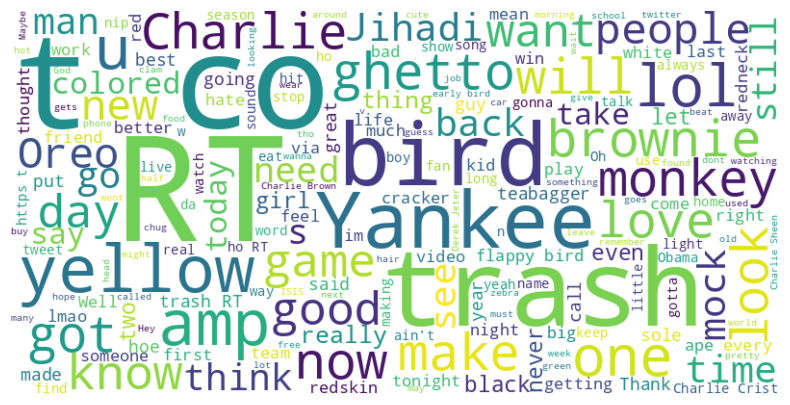

In [10]:
# Word Cloud for Appropriate Tweets (Raw)
generate_wordcloud(' '.join(list(df_tweets[df_tweets['label']==0].tweet)))

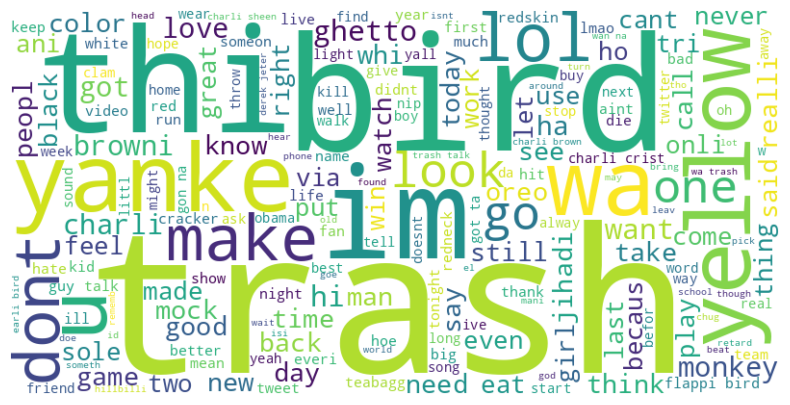

In [11]:
# Word Cloud for Appropriate Tweets (Pre-processed)
generate_wordcloud(' '.join(list(df_tweets[df_tweets['label']==0].clean_tweet)))

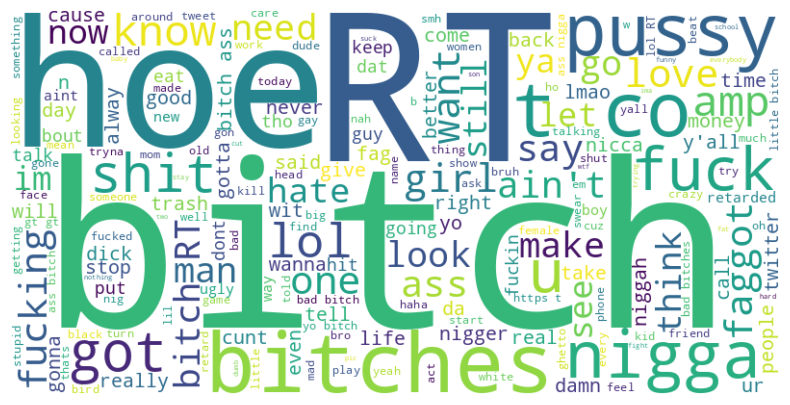

In [12]:
# Word Cloud for Inappropriate Tweets (Raw)
generate_wordcloud(' '.join(list(df_tweets[df_tweets['label']==1].tweet)))

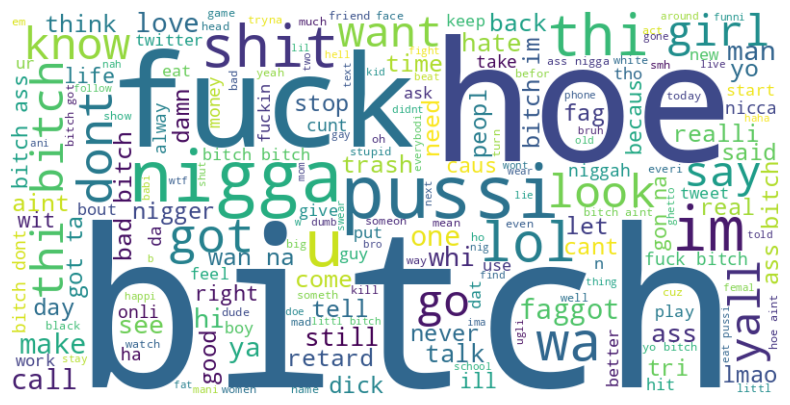

In [13]:
# Word Cloud for Inappropriate Tweets (Pre-processed)
generate_wordcloud(' '.join(list(df_tweets[df_tweets['label']==1].clean_tweet)))

In [14]:
df_tweets['label'].value_counts()

,count
label,
1,20620
0,4163


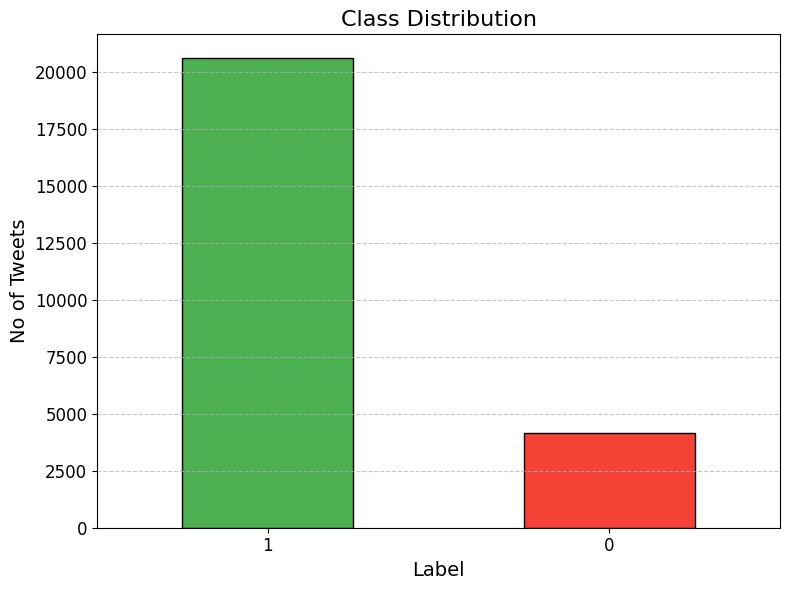

In [15]:
# Class Distribution

class_distribution = df_tweets['label'].value_counts()
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['#4CAF50', '#F44336'], edgecolor='black')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('No of Tweets', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis with dashed style
plt.tight_layout()
plt.show()

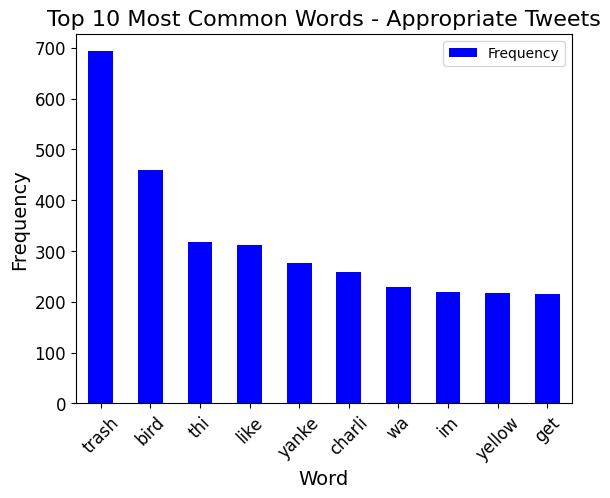

In [16]:
# Bar Plot of Word Frequencies

from collections import Counter

all_tweets = ' '.join(df_tweets[df_tweets['label']==0]['clean_tweet'])
all_tokens = word_tokenize(all_tweets)
word_freq = Counter(all_tokens)
top_words = word_freq.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
top_words_df.plot(kind='bar', x='Word', y='Frequency', color='blue')
plt.title('Top 10 Most Common Words - Appropriate Tweets', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

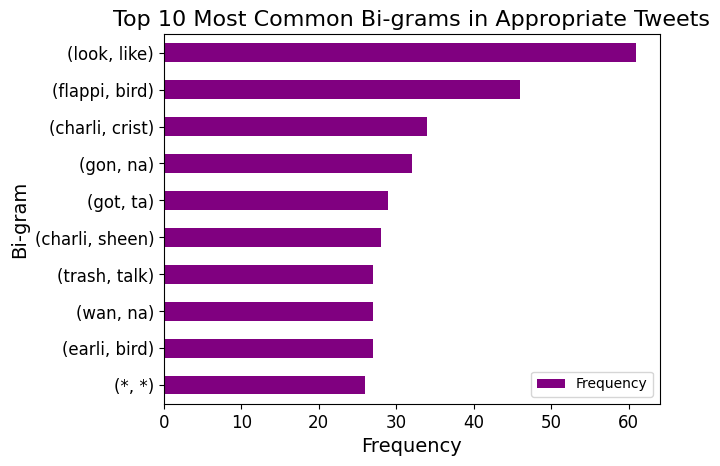

In [18]:
# N-gram Analysis

from nltk.util import ngrams

n = 2
ngram_freq = Counter(ngrams(all_tokens, n))
top_ngrams = ngram_freq.most_common(10)
top_ngrams_df = pd.DataFrame(top_ngrams, columns=['N-gram', 'Frequency'])
top_ngrams_df = top_ngrams_df.sort_values(by='Frequency', ascending=True)
top_ngrams_df.plot(kind='barh', x='N-gram', y='Frequency', color='purple')
plt.title('Top 10 Most Common Bi-grams in Appropriate Tweets', fontsize=16)
plt.xlabel('Frequency'.format(n), fontsize=14)
plt.ylabel('Bi-gram', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# LSTM

In [20]:
!pip install keras


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
#=====================Importing Necessary Libraries==========================#

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [26]:
#====================Reading Preprocessed Data========================#

df = pd.read_csv('preprocessed_data.csv')

df['clean_tweet'] = df['clean_tweet'].astype(str)

# Convert preprocessed tweets and labels to numpy arrays
tweets = df['clean_tweet'].values
labels = df['label'].values

In [27]:
#=====================Text Tokenization and Sequence Padding======================#

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(tweets)

# Pad sequences to ensure uniform length
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length)

In [28]:
#====================Dataset Split (Training:Testing)=======================#

# Convert labels to categorical
y = np.array(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#====================LSTM Model Build========================#

# Build LSTM model
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
embedding_dim = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
#=====================LSTM Model Training=========================#

# Apply early stopping to avoid overfitting of data
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.8682 - loss: 0.3216 - val_accuracy: 0.9506 - val_loss: 0.1296
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.9673 - loss: 0.0861 - val_accuracy: 0.9486 - val_loss: 0.1361
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9831 - loss: 0.0481 - val_accuracy: 0.9431 - val_loss: 0.1653
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9326 - val_loss: 0.2197
Epoch 4: early stopping


In [33]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

#============================ Model Evaluation============================#

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate classification report
target_names = ['Appropriate', 'Inappropriate']
report = classification_report(y_test, y_pred, target_names=target_names)

# Print the classification report
print("Classification Report:\n", report)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("\nEvaluation Metrics:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.2108
Test Loss: 0.21973121166229248
Test Accuracy: 0.9326205253601074
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step
Classification Report:
                precision    recall  f1-score   support

  Appropriate       0.81      0.78      0.80       835
Inappropriate       0.96      0.96      0.96      4122

     accuracy                           0.93      4957
    macro avg       0.88      0.87      0.88      4957
 weighted avg       0.93      0.93      0.93      4957


Evaluation Metrics:

Accuracy: 0.9326205366148881
Precision: 0.9559460760712566
Recall: 0.9633672974284327
F1-score: 0.9596423392943451


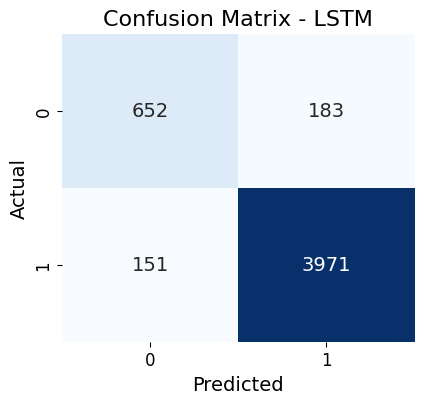

In [35]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - LSTM', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [36]:
#============================ Model preformance Testing ============================#

# Preprocess custom text
custom_text = ["Kill Yourself"]
preprocessed_custom_text = preprocess(custom_text)[0]

# Tokenize and pad the sequence
custom_sequence = tokenizer.texts_to_sequences([preprocessed_custom_text])
padded_custom_sequence = pad_sequences(custom_sequence, maxlen=max_length)

# Make prediction
prediction = model.predict(padded_custom_sequence)
print(prediction)

# Interpret the prediction result
if prediction > 0.5:
    print("Inappropriate.")
else:
    print("Appropriate.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.7101266]]
Inappropriate.


In [39]:
from google.colab import files
files.download('Content_moderation.h5')  # or 'model.pth'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>